Задача: определить комплементарные товары (ассоциативные правила).

In [1]:
# обработка данных
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# обучение и оценка
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# загрузим данные

df = pd.read_csv('D:\\Work\\data\\marketplace\\test_data.csv', sep=';')
df

,creation_date,region_id,customer_id,order_id,order_status,category_id,order_sum,items_qty
0,27.11.2019,1200,1001320890,21929828,DELIVERED,7,824,1
1,04.11.2018,150,241257124,8127000,DELIVERED,4,1199,2
2,23.01.2019,1125,399269970,9669842,DELIVERED,4,618,1
3,15.10.2019,100,654445333,18865900,DELIVERED,14,1394,1
4,30.01.2019,875,770011847,9793312,DELIVERED,2,4115,1
...,...,...,...,...,...,...,...,...
692918,21.12.2019,1225,890928366,24365774,CANCELLED,16,32703,1
692919,19.07.2019,1625,592611351,15152708,DELIVERED,5,1285,2
692920,22.09.2019,225,979695977,17688720,CANCELLED,4,877,1
692921,08.02.2019,1125,786541666,9952064,CANCELLED,15,2652,2


In [3]:
# добавим отдельными столбцами номера годов и месяцев (работать будем с помесячными данными)

df['creation_date'] = pd.to_datetime(df['creation_date'])
df.sort_values(by='creation_date', inplace=True)
df_month = pd.DatetimeIndex(df['creation_date']).month
df_year = pd.DatetimeIndex(df['creation_date']).year
df.insert(1, 'Year', pd.DatetimeIndex(df['creation_date']).year)
df.insert(2, 'Month', pd.DatetimeIndex(df['creation_date']).month)
df

,creation_date,Year,Month,region_id,customer_id,order_id,order_status,category_id,order_sum,items_qty
102217,2018-01-11,2018,1,975,239654800,8097264,DELIVERED,2,9397,1
283472,2018-01-11,2018,1,24275,759823047,8101192,DELIVERED,16,4550,1
361814,2018-01-11,2018,1,950,369653207,8101736,DELIVERED,16,7499,1
404926,2018-01-11,2018,1,225,542496200,8102704,CANCELLED,13,680,3
638139,2018-01-11,2018,1,1150,78347063,8099890,CANCELLED,16,14593,1
...,...,...,...,...,...,...,...,...,...,...
264522,2019-12-31,2019,12,1175,462447886,25209092,DELIVERED,16,27286,1
409150,2019-12-31,2019,12,24175,1010429215,25204122,DELIVERED,12,4981,1
264566,2019-12-31,2019,12,1075,93562625,25203548,DELIVERED,16,1893,1
301504,2019-12-31,2019,12,1100,574149524,25217628,CANCELLED,16,9038,1


In [4]:
# пропусков в данных нет, хорошо

df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692923 entries, 102217 to 446138
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   creation_date  692923 non-null  datetime64[ns]
 1   Year           692923 non-null  int64         
 2   Month          692923 non-null  int64         
 3   region_id      692923 non-null  int64         
 4   customer_id    692923 non-null  int64         
 5   order_id       692923 non-null  int64         
 6   order_status   692923 non-null  object        
 7   category_id    692923 non-null  int64         
 8   order_sum      692923 non-null  int64         
 9   items_qty      692923 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 58.2+ MB


In [5]:
# для равномерной картины работать будем с 2019 годом, отложим в сторону 2018 год

df2018 = df[df['Year'] == 2018]
df = df[df['Year'] == 2019]
df

,creation_date,Year,Month,region_id,customer_id,order_id,order_status,category_id,order_sum,items_qty
529604,2019-01-01,2019,1,1175,759894626,9264274,DELIVERED,16,8021,1
486762,2019-01-01,2019,1,1175,38345282,9268482,CANCELLED,5,888,1
304498,2019-01-01,2019,1,1125,773011457,9265582,DELIVERED,16,8191,1
250381,2019-01-01,2019,1,1125,774046027,9266234,DELIVERED,16,8191,1
528016,2019-01-01,2019,1,1225,686211918,9271396,DELIVERED,12,8434,1
...,...,...,...,...,...,...,...,...,...,...
264522,2019-12-31,2019,12,1175,462447886,25209092,DELIVERED,16,27286,1
409150,2019-12-31,2019,12,24175,1010429215,25204122,DELIVERED,12,4981,1
264566,2019-12-31,2019,12,1075,93562625,25203548,DELIVERED,16,1893,1
301504,2019-12-31,2019,12,1100,574149524,25217628,CANCELLED,16,9038,1


In [6]:
# и только с доставленными

df = df[df['order_status'] == 'DELIVERED']
df

,creation_date,Year,Month,region_id,customer_id,order_id,order_status,category_id,order_sum,items_qty
529604,2019-01-01,2019,1,1175,759894626,9264274,DELIVERED,16,8021,1
304498,2019-01-01,2019,1,1125,773011457,9265582,DELIVERED,16,8191,1
250381,2019-01-01,2019,1,1125,774046027,9266234,DELIVERED,16,8191,1
528016,2019-01-01,2019,1,1225,686211918,9271396,DELIVERED,12,8434,1
126796,2019-01-01,2019,1,1625,796520652,9266324,DELIVERED,2,2554,3
...,...,...,...,...,...,...,...,...,...,...
111852,2019-12-31,2019,12,975,25933585,25218210,DELIVERED,2,9901,1
338718,2019-12-31,2019,12,150,263019119,25205856,DELIVERED,2,1450,1
264522,2019-12-31,2019,12,1175,462447886,25209092,DELIVERED,16,27286,1
409150,2019-12-31,2019,12,24175,1010429215,25204122,DELIVERED,12,4981,1


In [7]:
df_ba = df[['category_id', 'order_id']].groupby(['category_id']).count()
df_ba

,order_id
category_id,
1,3888
2,39891
3,7100
4,68722
5,47584
6,704
7,23530
8,1150
9,4815


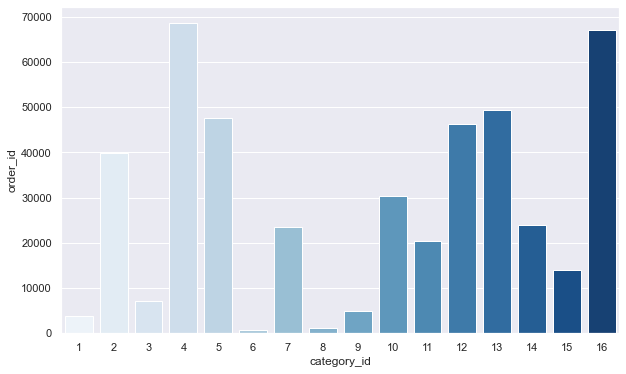

In [8]:
# заказы по категориям

plt.figure(figsize=(10, 6))
sns.barplot(x=df_ba.index, y="order_id", data=df_ba, palette='Blues')

Воспользуемся методом ассоциативных правил, что бы найти наиболее комплементарные товары. 

### Apriori

In [9]:
# готовим данные для работы алгоритма apriori, матрица по всем покупкам (заказам) и 
# категориям с фактом покупки (1 была, 0 не было)

basket_analysis = df.groupby(['order_id', 'category_id'])['customer_id'].count().unstack().reset_index().fillna(int(0)).set_index('order_id')
basket_analysis

category_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
order_id,,,,,,,,,,,,,,,,
9261276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9261366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9261464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9261744,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9261748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25219814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25219822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25219894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Небольшие пояснения по важным в данном случае терминам:

- **Аntecedents** = категория или набор категорий в заказе
- **Аntecedent support** = support отдельно Аntecedents
- **Сonsequents** = на выбор какой категории или набора влияет Antecedents 
- **Сonsequents support** = support отдельно Сonsequents
  
  
- **Support**  = насколько часто комбинация Аntecedents + Сonsequents встречается во всех заказах
- **Confidence** = насколько часто Аntecedents встречается во всех заказах по отношению к Сonsequents
- **Lift** = насколько чаще Сonsequents покупают вместе с Аntecedents, чем Сonsequents вообще
- **Conviction** = соотношение, насколько часто покупают Сonsequents без Аntecedents и насколько часто Аntecedents без Сonsequents

Нас интересуют самые ёмкие комбинации категорий со значением метрики **Support >= 0.02**:

In [10]:
# выведем топ 15 самых продаваемых комбинаций категорий (покупаются вместе чаще всего)

frequent_categories = apriori(basket_analysis, min_support=0.02, use_colnames=True)
frequent_categories['length'] = frequent_categories['itemsets'].apply(lambda x: len(x))
frequent_categories.sort_values(by ='support', ascending=False)[:15]

,support,itemsets,length
2,0.194872,(4),1
11,0.190270,(16),1
8,0.139846,(13),1
3,0.134932,(5),1
7,0.131158,(12),1
0,0.113117,(2),1
5,0.085974,(10),1
9,0.067698,(14),1
4,0.066723,(7),1
6,0.057683,(11),1


Очевидно, самая популярная категория 4 (присутствует в **19.5%** всех заказов). Затем 16 категория (в **19%** всех заказов). Но важнее именно комбинации, что с чем покупают:

In [11]:
rules = association_rules(frequent_categories, metric='lift', min_threshold=True)
rules.sort_values(['support', 'lift'], ascending=[False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(13),(5),0.139846,0.134932,0.031686,0.226575,1.679181,0.012816,1.118490
5,(5),(13),0.134932,0.139846,0.031686,0.234827,1.679181,0.012816,1.124130
0,(4),(5),0.194872,0.134932,0.027095,0.139038,1.030434,0.000800,1.004770
1,(5),(4),0.134932,0.194872,0.027095,0.200803,1.030434,0.000800,1.007421
2,(10),(5),0.085974,0.134932,0.020196,0.234902,1.740895,0.008595,1.130663
3,(5),(10),0.134932,0.085974,0.020196,0.149672,1.740895,0.008595,1.074910


1) 13 и 5 категории присутствую одновременно в **3.16%** всех заказов (support). И в **2.3%** случаев если берут одно, то возьмут и другое (confidence) - причем связь сильная, ощутимо более 1: **1.68** (lift).  
2) 4 и 5 категории так же активно покупают вместе, **2.7%**, но связь почти равна единице **1.03**, т.е. скорее всего категории просто независимо популярные.  
3) 10 и 5 категории встречаются в одном заказе в **2%** случаев, при сильной связи **1.74**. Тоже стоит внимания.